# Abhinay Angadi

### DATA SCIENCE AND BUSINESS ANALYTICS INTERN @ THE SPARKS FOUNDATION
GRIP TSF DATASCIENCE

# Perform Exploratory data analysis for given dataset
As a business manager, try to findout the weak areas where you can work to make more profits

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('SampleSuperstore.csv')
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
df.shape

(9994, 13)

In [9]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [26]:
df.isnull().any().sum()

0

In [32]:
df.duplicated().sum()

17

# Exploratory Data Analysis

For the question, we have been asked to visualize the data in terms of profit so, we will be mainly focusing on profit

In [34]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [66]:
df1 = pd.DataFrame(df.groupby(['Ship Mode'])['Profit'].sum()).reset_index()
df1

,Ship Mode,Profit
0,First Class,48969.8399
1,Same Day,15891.7589
2,Second Class,57446.6354
3,Standard Class,164088.7875


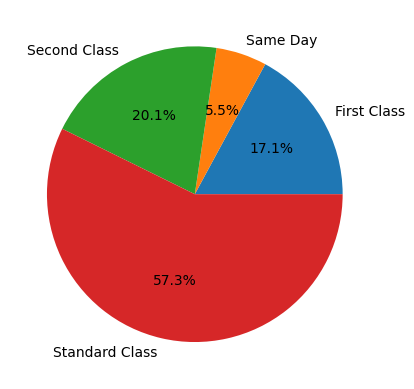

In [73]:
plt.pie(df1['Profit'],labels=df1['Ship Mode'],autopct='%1.1f%%')
plt.show()

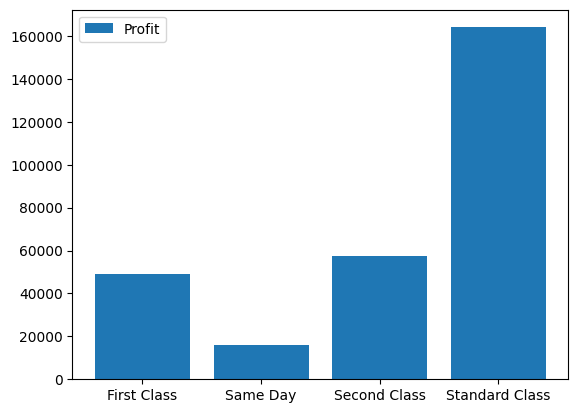

In [93]:
plt.bar(df1['Ship Mode'],df1['Profit'],label='Profit')
plt.legend()
plt.show()

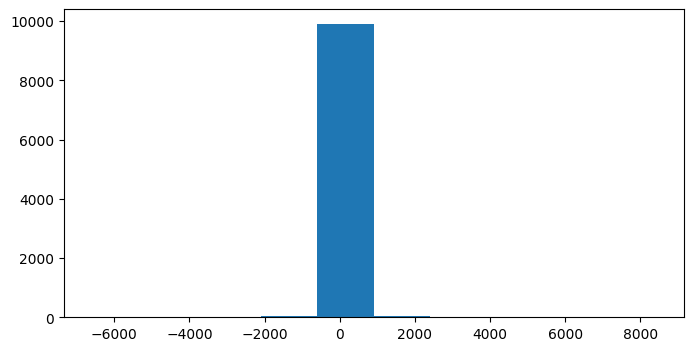

In [121]:
plt.figure(figsize=(8, 4))
plt.hist(df['Profit'],bins=10)
plt.show()

# Q- Which Segment brings the highest profit

In [100]:
df2 = pd.DataFrame(df.groupby(['Segment'])['Profit'].sum()).reset_index()
df2

,Segment,Profit
0,Consumer,134119.2092
1,Corporate,91979.1340
2,Home Office,60298.6785


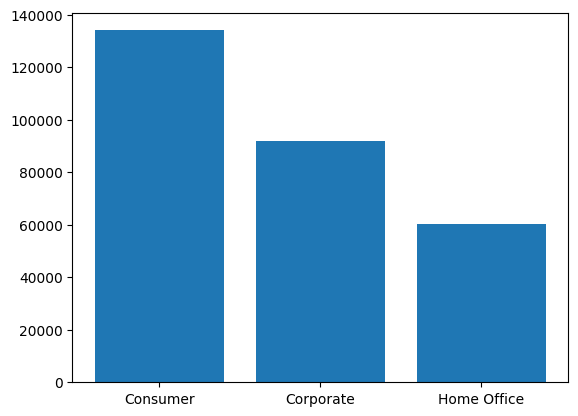

In [122]:
plt.bar(df2['Segment'],df2['Profit'])
plt.show()

In [129]:
df3 = pd.DataFrame(df.groupby(['State'])['Profit'].sum()).reset_index()
df3=df3[df3['Profit'].values >0]

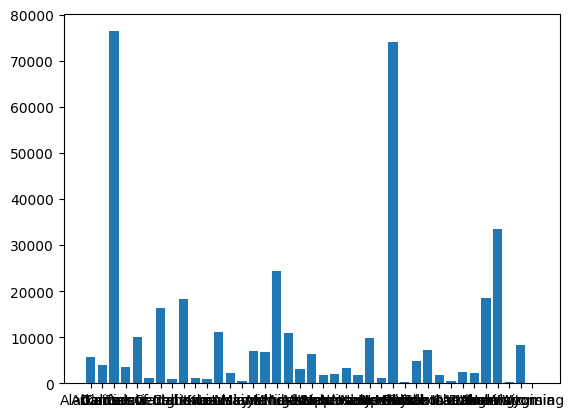

In [130]:
plt.bar(df3['State'],df3['Profit'])
plt.show()

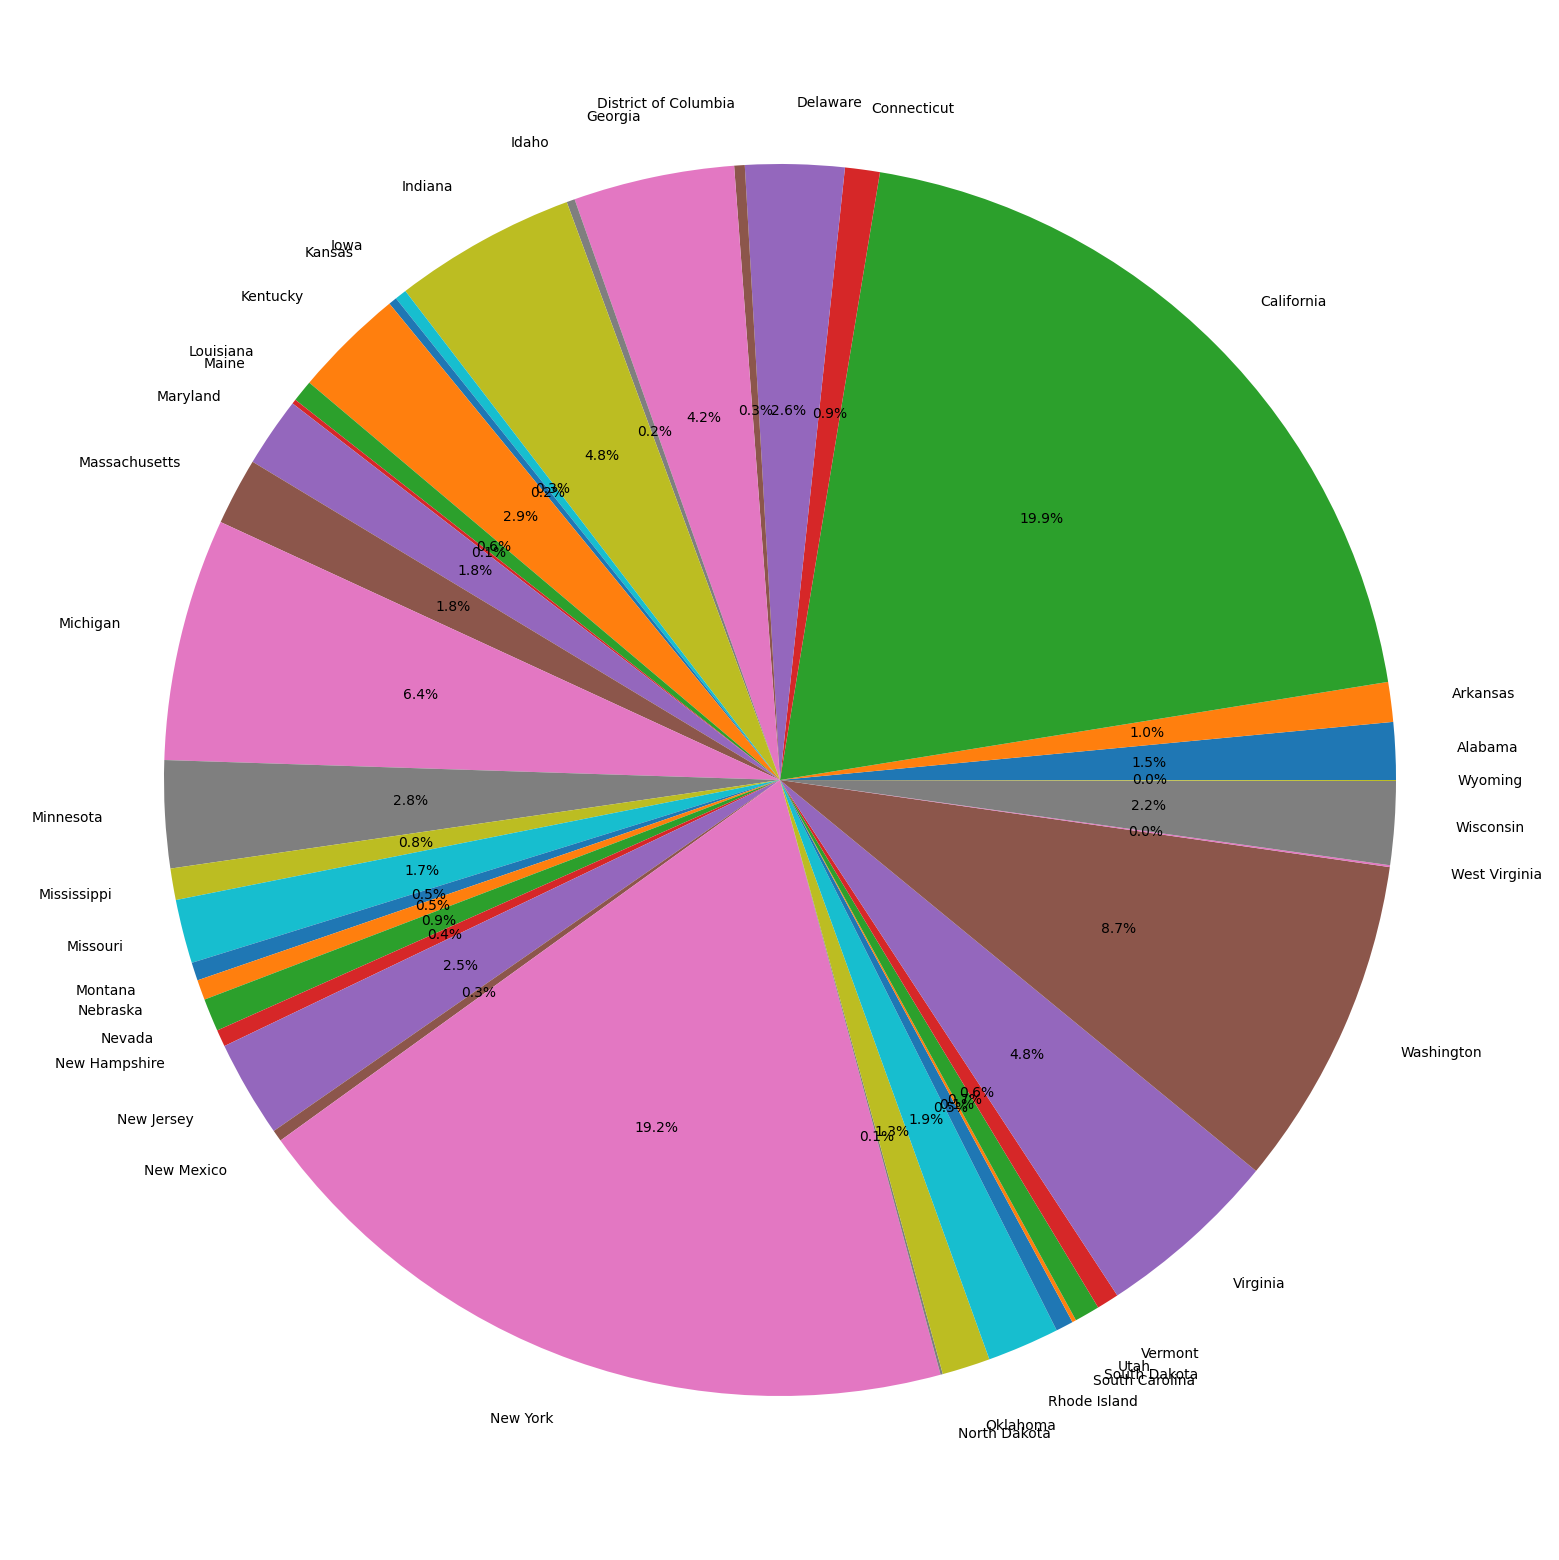

In [136]:
plt.figure(figsize=(30,20))
plt.pie(df3['Profit'],labels=df3['State'],autopct='%1.1f%%')
plt.show()

# Q- Which Category brings the highest profit

In [137]:
df4 = pd.DataFrame(df.groupby(['Category'])['Profit'].sum()).reset_index()
df4

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


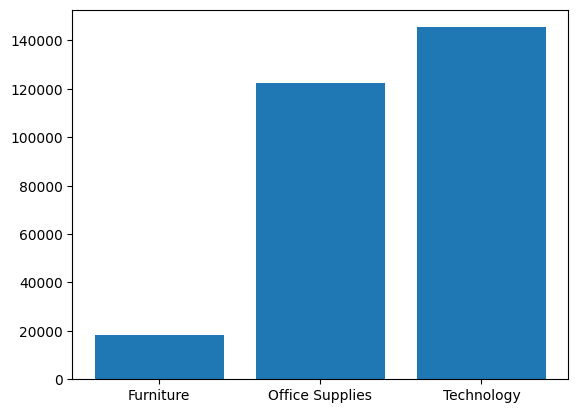

In [139]:
plt.bar(df4['Category'],df4['Profit'])
plt.show()

# Profit analysis

In [141]:
pd.DataFrame(df['Profit']).describe()

,Profit
count,9994.000000
mean,28.656896
std,234.260108
min,-6599.978000
25%,1.728750
50%,8.666500
75%,29.364000
max,8399.976000


# Top 10 cities with highest and lowest profit

In [142]:
max_profit = pd.DataFrame(df.groupby(["City"])['Profit'].sum()).reset_index().sort_values('Profit', ascending=False).head(10)
max_profit

,City,Profit
329,New York City,62036.9837
266,Los Angeles,30440.7579
452,Seattle,29156.0967
438,San Francisco,17507.3854
123,Detroit,13181.7908
233,Lafayette,10018.3876
215,Jackson,7581.6828
21,Atlanta,6993.6629
300,Minneapolis,6824.5846
437,San Diego,6377.1960


In [143]:
min_profit = pd.DataFrame(df.groupby(["City"])['Profit'].sum()).reset_index().sort_values('Profit', ascending=False).tail(10)
min_profit

,City,Profit
216,Jacksonville,-2323.8350
24,Aurora,-2691.7386
375,Phoenix,-2790.8832
109,Dallas,-2846.5257
60,Burlington,-3622.8772
80,Chicago,-6654.5688
241,Lancaster,-7239.0684
434,San Antonio,-7299.0502
207,Houston,-10153.5485
374,Philadelphia,-13837.7674
